<a href="https://colab.research.google.com/github/KazaGeetanjali/GIScode/blob/main/PS4_Kaza_Geetanjali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PS4

we are comparing salries between the world , US, India based on different factors.

In PS3 as we did more research on jobs and salaries in New York to calculate the cost of living we are doing analysis on the property sales only in New York

In [1]:
!pip install country_converter

import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import country_converter as coco

theme_colors = ['#FF1654', '#20A4F3', '#14A073', '#F9C846', '#4C5760']

# font = 'Helvetica'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 1.0 MB/s eta 0:00:00


In [2]:
! wget -q -O ds_salaries.csv https://raw.githubusercontent.com/KazaGeetanjali/GIScode/main/ds_salaries.csv

df = pd.read_csv("ds_salaries.csv", encoding='latin1') #reading the file from GIThub and encoding the special characters present in the file
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Data Cleaning

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df = df[df['salary_in_usd'] < 400000]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           600 non-null    int64 
 1   experience_level    600 non-null    object
 2   employment_type     600 non-null    object
 3   job_title           600 non-null    object
 4   salary              600 non-null    int64 
 5   salary_currency     600 non-null    object
 6   salary_in_usd       600 non-null    int64 
 7   employee_residence  600 non-null    object
 8   remote_ratio        600 non-null    int64 
 9   company_location    600 non-null    object
 10  company_size        600 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.2+ KB


In [5]:
df['remote_ratio'] = df['remote_ratio'].astype('str')

df['remote_ratio'] = df['remote_ratio'].replace(['0'],'On Site')
df['remote_ratio'] = df['remote_ratio'].replace(['50'],'Hybrid')
df['remote_ratio'] = df['remote_ratio'].replace(['100'],'Remote')

In [6]:
df['remote_ratio'].value_counts()

Remote     376
On Site    126
Hybrid      98
Name: remote_ratio, dtype: int64

Donut Chart

In [7]:
experience_level_df = df.groupby(['experience_level']).size().reset_index().rename(columns={0: 'count'})

company_size_df = df.groupby(['company_size']).size().reset_index().rename(columns={0: 'count'})

work_year_df = df.groupby(['work_year']).size().reset_index().rename(columns={0: 'count'})

remote_ratio_df = df.groupby(['remote_ratio']).size().reset_index().rename(columns={0: 'count'})


fig = make_subplots(rows=2, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}]
                          ])

## Experience Level Donut Chart
fig.add_trace(
    go.Pie(
        labels=experience_level_df['experience_level'],
        values=experience_level_df['count'],
        hole=.6,
        title='Experience',
        titlefont={'color':None, 'size': 24},
        ),
    row=1,col=1
    )

## Company Size Donut Chart
fig.add_trace(
    go.Pie(
        labels=company_size_df['company_size'],
        values=company_size_df['count'],
        hole=.6,
        title='Company Size',
        titlefont={'color':None, 'size': 24},
        ),
    row=1,col=2
    )

## Work Year Donut Chart
fig.add_trace(
    go.Pie(
        labels=work_year_df['work_year'],
        values=work_year_df['count'],
        hole=.6,
        title='Work Year',
        titlefont={'color':None, 'size': 24},
        ),
    row=2,col=1
    )


## Remote Ratio Donut Chart
fig.add_trace(
    go.Pie(
        labels=remote_ratio_df['remote_ratio'],
        values=remote_ratio_df['count'],
        hole=.6,
        title='Remote Ratio',
        titlefont={'color':None, 'size': 24},
        ),
    row=2,col=2
    )

fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent',
    textfont_size=12,
    marker=dict(
        colors=theme_colors,
        line=dict(color='#EEEEEE',
                  width=2)
        )
    )


fig.layout.update(title="<b> Categorical Features Donut Charts <b>",
                  titlefont={'color':None, 'size': 28, 'family': 'Courier New'},
                  showlegend=False,
                  height=800,
                  width=800,
                  template='plotly_dark',
                  title_x=0.5
                  )
fig.show()

In [8]:
usa_df = df[df['company_location'] == 'US']

In [9]:
## Indian Salaries DF
! wget -q -O Data_Science_Jobs_in_India.csv https://raw.githubusercontent.com/KazaGeetanjali/GIScode/main/Data_Science_Jobs_in_India.csv

india_df = pd.read_csv("Data_Science_Jobs_in_India.csv", encoding='latin1') #reading the file from GIThub and encoding the special characters present in the file
#df.head()

#india_df = pd.read_csv('../input/data-science-jobs-in-india/Data_Science_Jobs_in_India.csv')

india_df['avg_salary'] = india_df['avg_salary'].str.replace("L", "", regex=True)
india_df['avg_salary'] = india_df['avg_salary'].str.replace(".", "", regex=True)

india_df['avg_salary'] = india_df['avg_salary'].astype('float')
india_df['avg_salary'] = india_df['avg_salary'] * 125
india_df['avg_salary'] = india_df['avg_salary'].astype('int')
india_df = india_df[['company_name', 'job_title', 'min_experience', 'avg_salary']]

In [10]:
india_df

,company_name,job_title,min_experience,avg_salary
0,TCS,Data Scientist,2,9750
1,Accenture,Data Scientist,2,16000
2,IBM,Data Scientist,2,16750
3,Cognizant,Data Scientist,2,12250
4,Capgemini,Data Scientist,2,10750
...,...,...,...,...
1597,Collabera Technologies,Data Architect,8,21250
1598,Coforge,Data Architect,7,33875
1599,Hitachi,Data Architect,21,50000
1600,GE Power,Data Architect,7,20875


Salary Comparision Histograms

In [11]:
fig=make_subplots(rows=3,cols=1,subplot_titles=('<i>World Salaries', '<i>US Salaries', '<i>Indian Salaries'))
fig.add_trace(go.Histogram(x=df['salary_in_usd'],name='World'),row=1,col=1)
fig.add_trace(go.Histogram(x=usa_df['salary_in_usd'],name='US'),row=2,col=1)
fig.add_trace(go.Histogram(x=india_df['avg_salary'],name='India'),row=3,col=1)

fig.update_layout(height=600, width=800, title_text='<b>Salary Comparison', font_size=20)
fig.update_layout(template='plotly_dark', title_x=0.5, font_family='Courier New', showlegend=False)

Median Salary around the world: $101.5K

Median Salary around the US: $135K

Median Salary around the India: $14.9K

**Multiple Box Plots**

In [12]:
fig=make_subplots(rows=4,cols=1,subplot_titles=('<i>Experience Level', '<i>Remote Ratio', '<i>Company Size', '<i>Year'))
fig.add_trace(go.Box(x=df['experience_level'] ,y=df['salary_in_usd'], boxpoints='all'),row=1,col=1)
fig.add_trace(go.Box(x=df['remote_ratio'] ,y=df['salary_in_usd'], boxpoints='all'),row=2,col=1)
fig.add_trace(go.Box(x=df['company_size'] ,y=df['salary_in_usd'], boxpoints='all'),row=3,col=1)
fig.add_trace(go.Box(x=df['work_year'] ,y=df['salary_in_usd'], boxpoints='all'),row=4,col=1)


fig.update_layout(height=1000, width=800, title_text='<b>Salaries WRT', font_size=20)
fig.update_layout(template='plotly_dark', title_x=0.5, font_family='Courier New', showlegend=False)

Salary Order wrt Experience: EX > SE > MI > EN

Salary Order wrt Remote Ratio: Remote > On Site > Hybrid

Salary Order wrt Company Size: Medium > Large > Small

Salary Order wrt Year: 2022 > 2021 > 2020

**Job Title Box Plot**

In [13]:
job_title_list = ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer',
                 'Research Scientist', 'Data Science Manager', 'Data Architect', 'Big Data Engineer']

temp_job_df = df[df['job_title'].isin(job_title_list)]

In [14]:
fig = px.box(temp_job_df, x="job_title", y="salary_in_usd", color="job_title",
             notched=True, points='all',
             title="Salaries as per Job Title",
             hover_data=["job_title"], template='plotly_dark'
            )
fig.show()

**Company Location Box Plot**

In [15]:
location_list = ['US', 'GB', 'CA', 'DE', 'IN', 'FR', 'ES', 'GR']

temp_location_df = df[df['company_location'].isin(location_list)]

In [16]:
fig = px.box(temp_location_df, x="company_location", y="salary_in_usd", color="company_location",
             notched=True, points='all',
             title="Salaries as per Company Locations",
             hover_data=["company_location"], template='plotly_dark'
            )
fig.show()

**Average Salary World Map**

In [17]:
country_names = coco.convert(names=df['company_location'], to="ISO3")
df['company_location'] = country_names

In [18]:
salary_location_df = df.groupby(['salary_in_usd', 'company_location']).size().reset_index()
average_salary = salary_location_df.groupby('company_location').mean().reset_index()

fig = px.choropleth(locations=average_salary['company_location'],
                    color=average_salary['salary_in_usd'],
                    color_continuous_scale=px.colors.sequential.RdBu,
                    template='plotly_dark')
fig.update_layout(font = dict(size=17,family="Courier new"))

fig.update_layout(
    title="Average Salary by Company Location", title_x=0.5,
    font=dict(
        family="Rubik",
        size=18
    )
)

fig.show()

**Tree Map**

In [19]:
company_remote_df = df.groupby(['company_size', 'remote_ratio', 'salary_in_usd']).size().reset_index().rename(columns={0: 'count'})

fig = px.treemap(company_remote_df, path=[px.Constant("Treemap"), 'company_size', 'remote_ratio'], values='count',
                  color='salary_in_usd', hover_data=['count'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(company_remote_df['salary_in_usd'], weights=company_remote_df['count']))

fig.update_traces(textinfo="label+percent parent")

fig.update_layout(title_text="<i> Company Size </i> X <i> Remote Ratio </i> X <i> Salary </i>", title_x=0.5, height=500, template='plotly_dark',
        font=dict(
            family="Rubik",
            size=14)
)

fig.show()

***Highest Paying Combinations:***

Medium Company and Remote, Avg Salary: $124.9K

Large Company and Remote, Avg Salary: $122.5K

Large Company and On Site, Avg Salary: $120.9K

***Lowest Paying Combinations:***

Medium Company and Hybrid, Avg Salary: $61.8K

Small Company and On Site, Avg Salary: $65.5K

Small Company and Hybrid, Avg Salary: $73.3K

### **3D Scatter Plot**

In [20]:
fig = px.scatter_3d(df, x='experience_level', y='remote_ratio', z='salary_in_usd',
                    color='salary_in_usd')
fig.update_layout(title='<b> 3D Scatter Plot <b>', title_x=0.5,
                  titlefont=dict({'size':28, 'family': 'Courier New', 'color':'white'}),
                  template='plotly_dark',
                  width=900, height=500,
                 )
fig.update_layout(scene = dict(
                    xaxis = dict(
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="black",),
                    yaxis = dict(
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="black"),
                    zaxis = dict(
                        backgroundcolor="rgb(230, 230,200)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="black"),
                              ),
                  )
fig.show()

In [21]:
import os
#print(os.listdir("../input"))
import warnings
warnings.filterwarnings("ignore")

In [23]:
! wget -q -O nyc-rolling-sales.csv https://raw.githubusercontent.com/KazaGeetanjali/GIScode/main/nyc-rolling-sales.csv

hsales = pd.read_csv("nyc-rolling-sales.csv", encoding='latin1') #reading the file from GIThub and encoding the special characters present in the file
hsales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [24]:
hsales.drop(['Unnamed: 0', 'EASE-MENT'],1, inplace=True)

It looks like empty records are not being treated as NA. We convert columns to their appropriate data types to obtain NA's.

In [25]:
#First, let's check which columns should be categorical
print('Column name')
for col in hsales.columns:
    if hsales[col].dtype=='object':
        print(col, hsales[col].nunique())

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [26]:
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric.
# SALE DATE datetime format.
# categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH

numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    hsales[col] = pd.to_numeric(hsales[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    hsales[col] = hsales[col].astype('category')

hsales['SALE DATE'] = pd.to_datetime(hsales['SALE DATE'], errors='coerce')

Our dataset is ready for checking missing values.

In [27]:
missing = hsales.isnull().sum()/len(hsales)*100

print(pd.DataFrame([missing[missing>0],pd.Series(hsales.isnull().sum()[hsales.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


Around 30% of GROSS SF and LAND SF are missing. Furthermore, around 17% of SALE PRICE is also missing. Below graph indicates which parts of the table are missing values in yellow.

<Axes: >

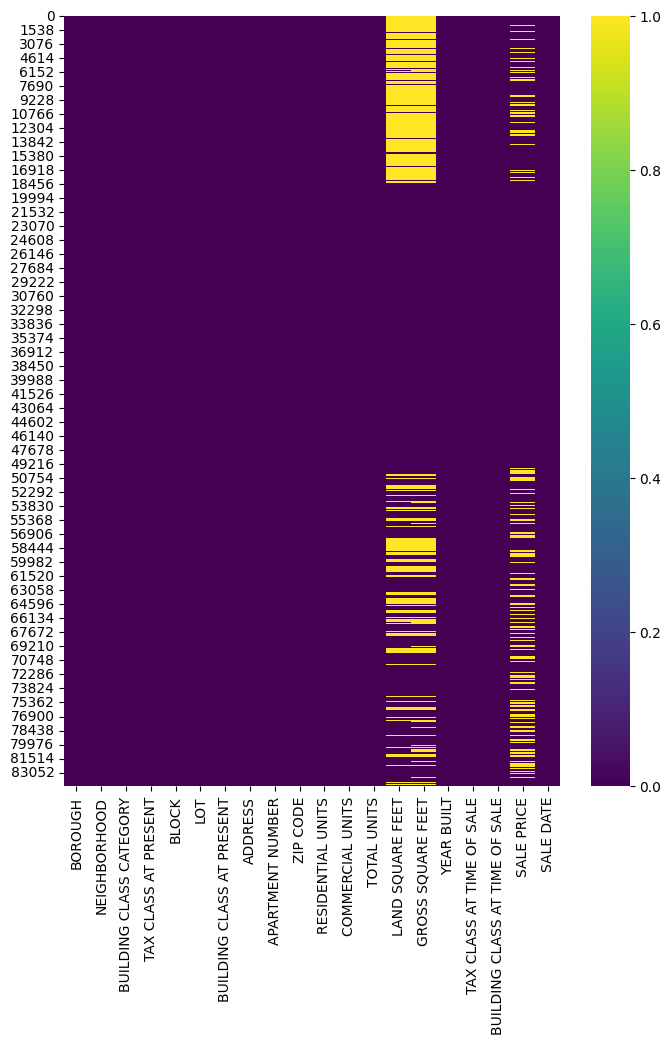

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(8,10))
sns.heatmap(hsales.isnull(),cmap='viridis')

Based on the missing values heatmap, we can see that some of the missing values in LAND SQUARE FEET exists in GROSS SQUARE FEET and vice versa. Assuming these two column values are close to each other, we can fill missing value from one another.

In [29]:
# let us check for outliers first
hsales[['LAND SQUARE FEET','GROSS SQUARE FEET']].describe()

,LAND SQUARE FEET,GROSS SQUARE FEET
count,5.829600e+04,5.693600e+04
mean,3.941676e+03,4.045707e+03
std,4.198397e+04,3.503249e+04
min,0.000000e+00,0.000000e+00
25%,1.650000e+03,1.046750e+03
50%,2.325000e+03,1.680000e+03
75%,3.500000e+03,2.560000e+03
max,4.252327e+06,3.750565e+06


There are outliers in the lower and upper bound of the columns. We will set an upper bound of 75% for our dataset as maximum since 75th percentile of the dataset represents a good cutoff for majority of houses' square feet metrics.

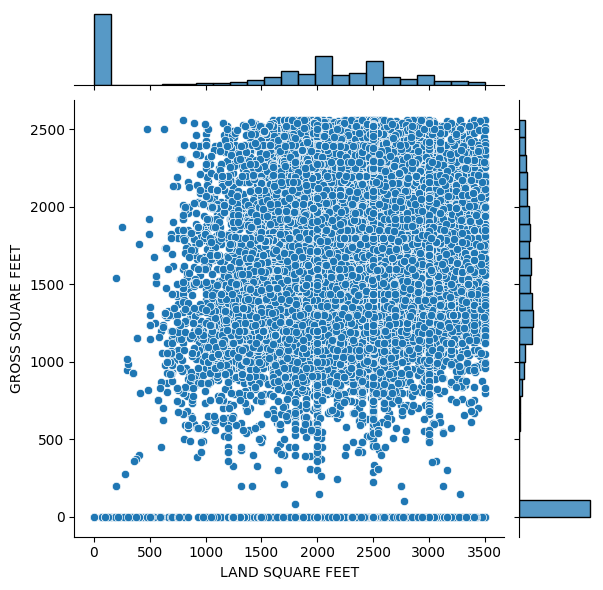

In [30]:
sns.jointplot(x='LAND SQUARE FEET', y='GROSS SQUARE FEET', data=hsales[(hsales['LAND SQUARE FEET']<=3500)& (hsales['GROSS SQUARE FEET']<=2560)], kind='scatter')

It is hard to notice any correlation from the scatter plot. Below is the correlation matrix.

In [32]:
hsales[(hsales['LAND SQUARE FEET']<=3500)& (hsales['GROSS SQUARE FEET']<=2560)][['LAND SQUARE FEET','GROSS SQUARE FEET']].corr()

,LAND SQUARE FEET,GROSS SQUARE FEET
LAND SQUARE FEET,1.000000,0.796219
GROSS SQUARE FEET,0.796219,1.000000


As we can see from the correlation matrix above, these two columns are positive correlated with r=0.79 (out of 1). We can now fill in the missing value from one column to another, which will help us reduce missing values.

In [33]:
print(hsales[(hsales['LAND SQUARE FEET'].isnull()) & (hsales['GROSS SQUARE FEET'].notnull())].shape)
print(hsales[(hsales['LAND SQUARE FEET'].notnull()) & (hsales['GROSS SQUARE FEET'].isnull())].shape)

(6, 20)
(1366, 20)


There are 1372 rows that can be filled in with their approximate values.

In [34]:
hsales['LAND SQUARE FEET'] = hsales['LAND SQUARE FEET'].mask((hsales['LAND SQUARE FEET'].isnull()) & (hsales['GROSS SQUARE FEET'].notnull()), hsales['GROSS SQUARE FEET'])
hsales['GROSS SQUARE FEET'] = hsales['GROSS SQUARE FEET'].mask((hsales['LAND SQUARE FEET'].notnull()) & (hsales['GROSS SQUARE FEET'].isnull()), hsales['LAND SQUARE FEET'])

In [35]:
#  Check for duplicates before
print(sum(hsales.duplicated()))
hsales[hsales.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)

765


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76286,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76322,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76643,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
76644,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
50126,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12
50127,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12


The dataframe has 765 duplicated rows (exluding the original rows).

Dropping duplicates

In [36]:
hsales.drop_duplicates(inplace=True)
print(sum(hsales.duplicated()))

0


In [37]:
missing = hsales.isnull().sum()/len(hsales)*100
print(pd.DataFrame([missing[missing>0],pd.Series(hsales.isnull().sum()[hsales.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET  SALE PRICE
percent missing          31.091033          31.091033     16.9199
how many missing      26049.000000       26049.000000  14176.0000


We can further impute the square footage of the missing observations from the existing Sale prices. However, doing so would mean some of the property square footages are being predicted by the SALE PRICE. We do not want this to happen because this might result in multicollinearity problem between square footage and SALE PRICE. Nonetheless, let us check how many missing square feet observations can be imputed from SALE PRICE.

In [38]:
print("The number of non-null prices for missing square feet observations:\n",((hsales['LAND SQUARE FEET'].isnull()) & (hsales['SALE PRICE'].notnull())).sum())

The number of non-null prices for missing square feet observations:
 21154


In [39]:
print("non-overlapping observations that cannot be imputed:",((hsales['LAND SQUARE FEET'].isnull()) & (hsales['SALE PRICE'].isnull())).sum())

non-overlapping observations that cannot be imputed: 4895


In [40]:
hsales[hsales['COMMERCIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,78777.000000,78777.000000,78777.000000,78777.000000,78777.000000,78777.0,78777.000000,5.278000e+04,5.278000e+04,78777.000000,6.562900e+04
mean,3.004329,4273.781015,395.422420,10722.737068,1.691737,0.0,1.724133,3.140140e+03,2.714612e+03,1781.065451,9.952969e+05
std,1.298594,3589.241940,671.604654,1318.493961,9.838994,0.0,9.835016,2.929999e+04,2.791294e+04,551.024570,3.329268e+06
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,1330.000000,23.000000,10304.000000,0.000000,0.0,1.000000,1.600000e+03,9.750000e+02,1920.000000,2.400000e+05
50%,3.000000,3340.000000,52.000000,11209.000000,1.000000,0.0,1.000000,2.295000e+03,1.600000e+03,1940.000000,5.294900e+05
75%,4.000000,6361.000000,1003.000000,11357.000000,2.000000,0.0,2.000000,3.300000e+03,2.388000e+03,1967.000000,9.219560e+05
max,5.000000,16322.000000,9106.000000,11694.000000,889.000000,0.0,889.000000,4.252327e+06,4.252327e+06,2017.000000,3.450000e+08


In [41]:
# for visualization purposes, we replace borough numbering with their string names
hsales['BOROUGH'] = hsales['BOROUGH'].astype(str)
hsales['BOROUGH'] = hsales['BOROUGH'].str.replace("1", "Manhattan")
hsales['BOROUGH'] = hsales['BOROUGH'].str.replace("2", "Bronx")
hsales['BOROUGH'] = hsales['BOROUGH'].str.replace("3", "Brooklyn")
hsales['BOROUGH'] = hsales['BOROUGH'].str.replace("4", "Queens")
hsales['BOROUGH'] = hsales['BOROUGH'].str.replace("5", "Staten Island")

In [42]:
hsales['BOROUGH'].value_counts()

Queens           26548
Brooklyn         23843
Manhattan        18102
Staten Island     8296
Bronx             6994
Name: BOROUGH, dtype: int64

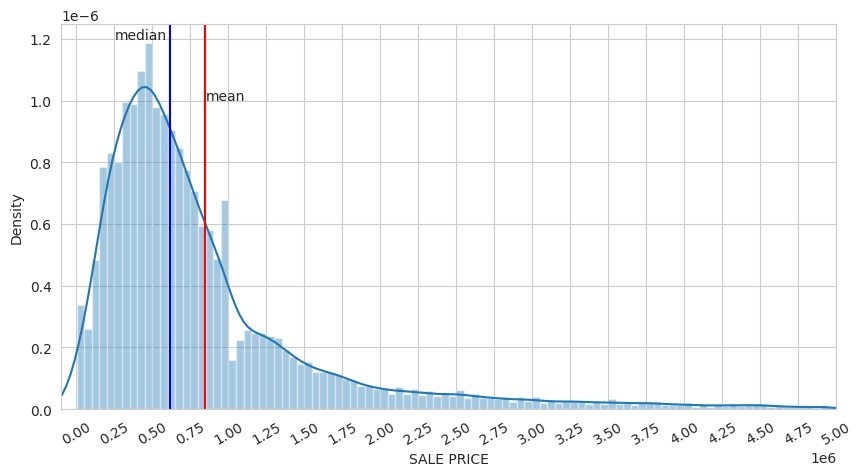

In [43]:
# house prices greater than 5 mln probably represents outliers.
import matplotlib.ticker as ticker

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plotd = sns.distplot(hsales[(hsales['SALE PRICE']>100) & (hsales['SALE PRICE'] < 5000000)]['SALE PRICE'], kde=True, bins=100)

tick_spacing=250000 # set spacing for each tick
plotd.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plotd.set_xlim([-100000, 5000000]) # do not show negative values
plt.xticks(rotation=30) # rotate x ticks by 30 degrees
plt.axvline(hsales[(hsales['SALE PRICE']>100) & (hsales['SALE PRICE'] < 5000000)]['SALE PRICE'].mean(), c='red')
plt.axvline(hsales[(hsales['SALE PRICE']>100) & (hsales['SALE PRICE'] < 5000000)]['SALE PRICE'].median(), c='blue')
plt.text(250000,0.0000012, "median")
plt.text(850000,0.0000010, "mean")
plt.show()

In [44]:
print("Uneqaul values for total units:", (hsales["TOTAL UNITS"] != hsales['COMMERCIAL UNITS'] + hsales['RESIDENTIAL UNITS']).sum())

Uneqaul values for total units: 2584


In [45]:
hsales[hsales["TOTAL UNITS"] != hsales['COMMERCIAL UNITS'] + hsales['RESIDENTIAL UNITS']]['TOTAL UNITS'].value_counts()

1      2563
2        12
3         4
14        1
24        1
4         1
9         1
117       1
Name: TOTAL UNITS, dtype: int64

These uneqaul values for total unit counts are mostly equal to 1 which might mean they are not residential or commercial units

In [46]:
hsales[(hsales["TOTAL UNITS"] != hsales['COMMERCIAL UNITS'] + hsales['RESIDENTIAL UNITS']) & (hsales["TOTAL UNITS"]==1)]['BUILDING CLASS CATEGORY'].value_counts()[:5]

44 CONDO PARKING                               1335
43 CONDO OFFICE BUILDINGS                       456
47 CONDO NON-BUSINESS STORAGE                   347
45 CONDO HOTELS                                 167
46 CONDO STORE BUILDINGS                        146
Name: BUILDING CLASS CATEGORY, dtype: int64

As we can observe those properties with 1 total units but with no residential or commercial units are parking, office or storages.

For visualization purposes, we will treat outliers seperately.

In [47]:
dataset = hsales[(hsales['COMMERCIAL UNITS']<20) & (hsales['TOTAL UNITS']<50) & (hsales['SALE PRICE']<5000000) & (hsales['SALE PRICE']>100000) & (hsales['GROSS SQUARE FEET']>0)]

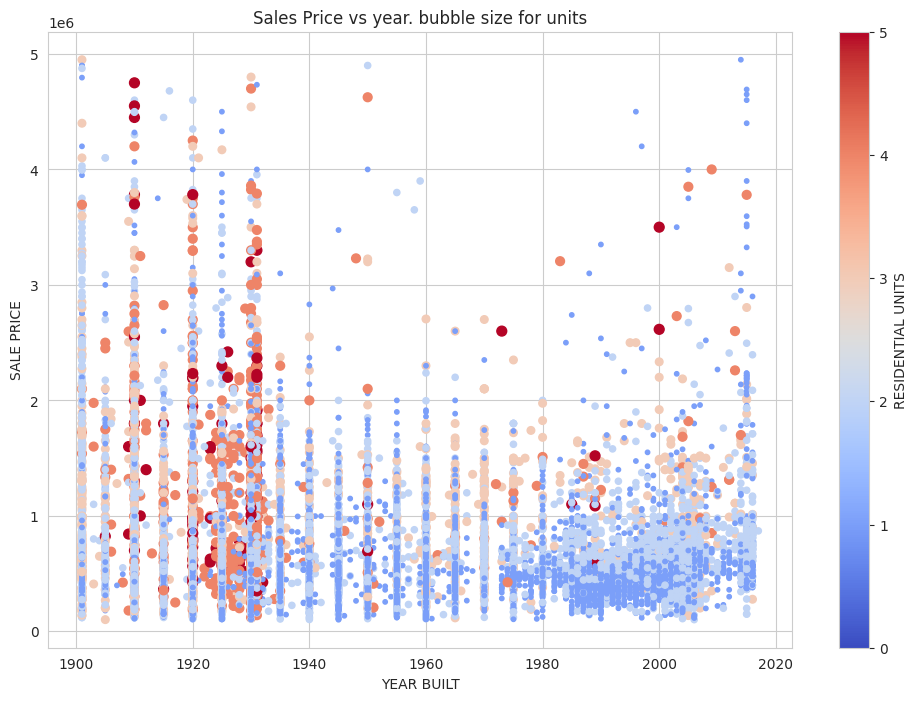

In [48]:
dataset[dataset['YEAR BUILT']>1900][dataset['RESIDENTIAL UNITS']<=5].plot.scatter(x='YEAR BUILT', y='SALE PRICE', c='RESIDENTIAL UNITS', cmap='coolwarm',figsize=(12,8),s=dataset[dataset['YEAR BUILT']>1900][dataset['RESIDENTIAL UNITS']<=5]['RESIDENTIAL UNITS']*10)
plt.title('Sales Price vs year. bubble size for units')
plt.show()

New properties built after 2000 are sold for relatively cheaper prices compared to houses built in early 1900s.

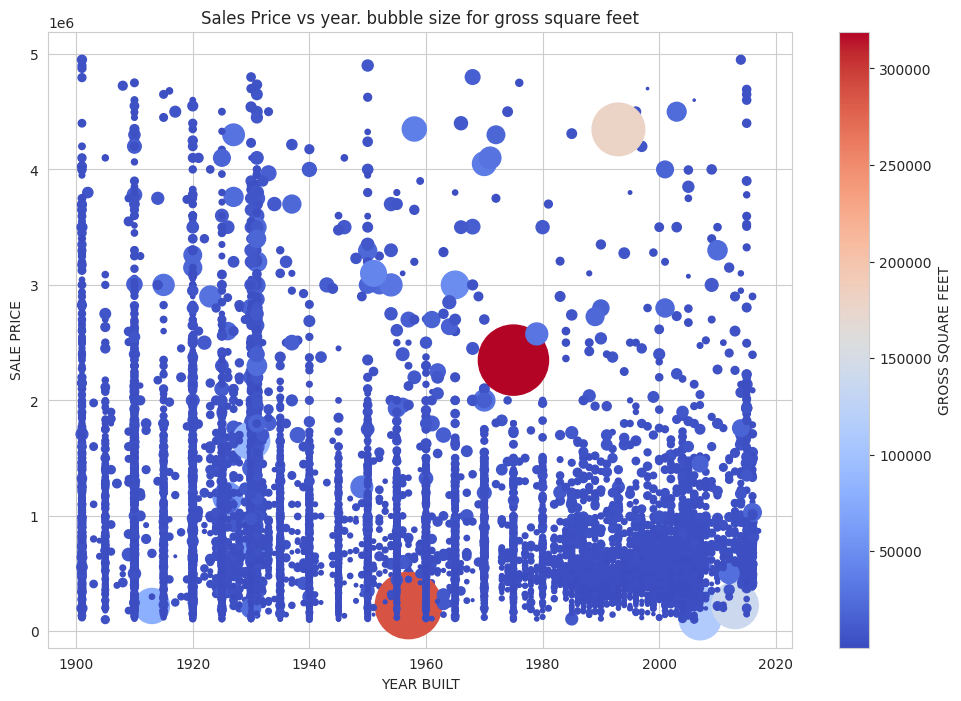

In [49]:
dataset[dataset['YEAR BUILT']>1900][dataset['RESIDENTIAL UNITS']<=5].plot.scatter(x='YEAR BUILT', y='SALE PRICE', c='GROSS SQUARE FEET', cmap='coolwarm',figsize=(12,8),s=dataset[dataset['YEAR BUILT']>1900][dataset['RESIDENTIAL UNITS']<=5]['GROSS SQUARE FEET']*.008)
plt.title('Sales Price vs year. bubble size for gross square feet')
plt.show()

In [50]:
import folium

In [51]:
zipcodes = dataset[hsales["ZIP CODE"]>0]
zipcodes['ZIP']=zipcodes['ZIP CODE'].astype(str) # zipcodes should be str type because geojson file zipcodes are read as str

In [52]:
boroughs = zipcodes[['ZIP','BOROUGH']]
boroughs.drop_duplicates('ZIP', inplace=True)

In [56]:
! wget -q -O uszipcodes_geodata.txt https://raw.githubusercontent.com/KazaGeetanjali/GIScode/main/uszipcodes_geodata.txt
us_zipcodes = pd.read_csv("uszipcodes_geodata.txt", encoding='latin1', delimiter=',', dtype=str)
#us_zipcodes = pd.read_csv("../input/nyc-zipcode-geodata/uszipcodes_geodata.txt", delimiter=',', dtype=str)
zipcodes_agg=pd.merge(zipcodes.groupby('ZIP').agg(np.mean), us_zipcodes, how='left', on='ZIP')
zipcodes_agg = pd.merge(zipcodes_agg, boroughs, how='left', on='ZIP')
zipcodes_agg.loc[116,'LAT']="40.6933"
zipcodes_agg.loc[116,'LNG']="-73.9925"

In [58]:
from folium.plugins import MarkerCluster # for clustering the markers
map = folium.Map(location=[40.693943, -73.985880], default_zoom_start=12)
map.choropleth(geo_data="https://raw.githubusercontent.com/KazaGeetanjali/GIScode/main/nyc-zip-code-tabulation-areas-polygons.geojson", # I found this NYC zipcode boundaries by googling
             data=zipcodes_agg, # my dataset
             columns=['ZIP', 'SALE PRICE'], # zip code is here for matching the geojson zipcode, sales price is the column that changes the color of zipcode areas
             key_on='feature.properties.postalCode', # this path contains zipcodes in str type, this zipcodes should match with our ZIP CODE column
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.3,
             legend_name='SALE PRICE')

# add a marker for every record in the filtered data, use a clustered view
marker_cluster = MarkerCluster().add_to(map) # create marker clusters
for i in range(zipcodes_agg.shape[0]):
    location = [zipcodes_agg['LAT'][i],zipcodes_agg['LNG'][i]]
    tooltip = "Zipcode:{}<br> Borough: {}<br> Click for more".format(zipcodes_agg["ZIP"][i], zipcodes_agg['BOROUGH'][i])
    folium.Marker(location,
                  popup="""<i>Mean sales price: </i> <br> <b>${}</b> <br>
                  <i>mean total units: </i><b><br>{}</b><br>
                  <i>mean square feet: </i><b><br>{}</b><br>""".format(round(zipcodes_agg['SALE PRICE'][i],2), round(zipcodes_agg['TOTAL UNITS'][i],2), round(zipcodes_agg['GROSS SQUARE FEET'][i],2)),
                  tooltip=tooltip).add_to(marker_cluster)
map

The interactive map shows detailed average prices for each zip code. The most expensive zip codes are 10001 and 10016, 10025 which are located in Manhattan.

In [59]:
map = folium.Map(location=[40.693943, -73.985880], default_zoom_start=12)
map.choropleth(geo_data="https://raw.githubusercontent.com/KazaGeetanjali/GIScode/main/nyc-zip-code-tabulation-areas-polygons.geojson", # I found this NYC zipcode boundaries by googling
             data=zipcodes, # my dataset
             columns=['ZIP', 'SALE PRICE'], # zip code is here for matching the geojson zipcode, sales price is the column that changes the color of zipcode areas
             key_on='feature.properties.postalCode', # this path contains zipcodes in str type, this zipcodes should match with our ZIP CODE column
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='SALE PRICE')
map

Saving the HTML file

In [60]:
map.save('nyczipcodeareas.html')